<a href="https://colab.research.google.com/github/galbraun/knesset_social_dynamics/blob/master/ERGM_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful links:
* Start with [introduction to ergm](https://cran.r-project.org/web/packages/ergm/vignettes/ergm.pdf)
* Example: [Lessons on exponential random graph modeling from Grey’s Anatomy hook-ups](http://badhessian.org/2012/09/lessons-on-exponential-random-graph-modeling-from-greys-anatomy-hook-ups/)

Eli Todo: 
1. Finish reading two links. 
2. Add example of directed graph

In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
install.packages('network')
install.packages('ergm')
install.packages('sna')
install.packages('coda')
library(network)
library(ergm)
library(sna)
library(coda)

set.seed(1)

In [52]:
%%R
# read the adjacency matrix
ga.mat <- as.matrix(read.table(file = "//content//sample_data//Grey's Anatomy - sociomat.tsv", sep="\t", header=T, row.names=1, quote="\""))

# read the network attributes
ga.atts <- read.table(file = "//content//sample_data//Grey's Anatomy - attributes.tsv", sep="\t", header=T, quote="\"", stringsAsFactors=F, strip.white=T, as.is=T)

# create a network object using the adjacency matrix and its corresponding attributes
ga.net <- network(ga.mat, vertex.attr=ga.atts, vertex.attrnames=colnames(ga.atts), directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

In [53]:
%%R
# network information
ga.net

 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 46 
    missing edges= 0 
    non-missing edges= 46 

 Vertex attribute names: 
    birthyear name position race season sex sign vertex.names 

No edge attributes


In [54]:
%%R
# print vertices names and sex
print(get.vertex.attribute(ga.net, "vertex.names"))
print(get.vertex.attribute(ga.net, "sex"))

 [1] "addison"      "adele"        "altman"       "amelia"       "arizona"     
 [6] "ava"          "avery"        "bailey"       "ben"          "burton"      
[11] "catherine"    "chief"        "colin"        "denny"        "derek"       
[16] "ellis.grey"   "finn"         "grey"         "hahn"         "hank"        
[21] "izzie"        "karev"        "kepner"       "lexi"         "lloyd"       
[26] "lucy"         "megan"        "mostow"       "mrs..seabury" "nancy"       
[31] "olivia"       "o.malley"     "owen"         "perkins"      "pierce"      
[36] "preston"      "reed"         "sloan"        "steve"        "susan.grey"  
[41] "thatch.grey"  "torres"       "tucker"       "yang"        
 [1] "F" "F" "F" "F" "F" "F" "M" "F" "M" "M" "F" "M" "M" "M" "M" "F" "M" "F" "F"
[20] "M" "F" "M" "F" "F" "M" "F" "F" "M" "F" "F" "F" "M" "M" "M" "M" "M" "F" "M"
[39] "M" "F" "M" "F" "M" "F"


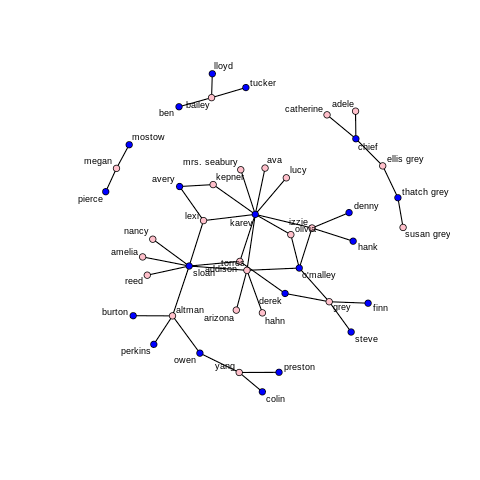

In [55]:
%%R
# plot of the network, coloring the nodes pink for the women and blue for the men
plot(ga.net, vertex.col=c("blue","pink")[1+(get.vertex.attribute(ga.net, "sex")=="F")],
          label=get.vertex.attribute(ga.net, "name"), label.cex=.75)

In [56]:
%%R
ga.base <- ergm(ga.net ~ edges + nodematch("sex")) # Estimate the model
summary(ga.base) # Summarize the model

R[write to console]: Starting maximum pseudolikelihood estimation (MPLE):

R[write to console]: Evaluating the predictor and response matrix.

R[write to console]: Maximizing the pseudolikelihood.

R[write to console]: Finished MPLE.

R[write to console]: Stopping at the initial estimate.

R[write to console]: Evaluating log-likelihood at the estimate. 
R[write to console]: 




Summary of model fit

Formula:   ga.net ~ edges + nodematch("sex")

Iterations:  6 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.3003     0.1581      0 -14.547   <1e-04 ***
nodematch.sex  -3.1399     0.7260      0  -4.325   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  320.5  on 944  degrees of freedom
 
AIC: 324.5    BIC: 334.2    (Smaller is better.) 


In [60]:
%%R
data(samplk)
ls() # directed data: Sampson's Monks

 [1] "adj_mat"      "foo"          "ga.atts"      "ga.base"      "ga.mat"      
 [6] "ga.net"       "samplk1"      "samplk2"      "samplk3"      "sampmodel.01"
[11] "sex"         


In [62]:
%%R
samplk3

 Network attributes:
  vertices = 18 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 56 
    missing edges= 0 
    non-missing edges= 56 

 Vertex attribute names: 
    cloisterville group vertex.names 

No edge attributes


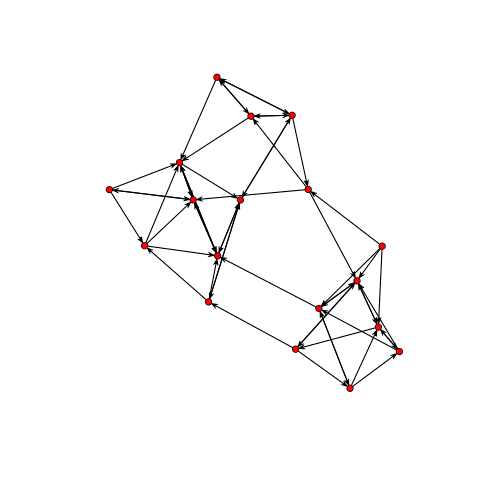

In [63]:
%%R
plot(samplk3)

In [65]:
%%R
sampmodel.01 <- ergm(samplk3~edges+mutual)
summary(sampmodel.01)

R[write to console]: Starting maximum pseudolikelihood estimation (MPLE):

R[write to console]: Evaluating the predictor and response matrix.

R[write to console]: Maximizing the pseudolikelihood.

R[write to console]: Finished MPLE.

R[write to console]: Starting Monte Carlo maximum likelihood estimation (MCMLE):

R[write to console]: Iteration 1 of at most 20:

R[write to console]: Optimizing with step length 1.

R[write to console]: The log-likelihood improved by 0.001286.

R[write to console]: Step length converged once. Increasing MCMC sample size.

R[write to console]: Iteration 2 of at most 20:

R[write to console]: Optimizing with step length 1.

R[write to console]: The log-likelihood improved by 0.001123.

R[write to console]: Step length converged twice. Stopping.

R[write to console]: Finished MCMLE.

R[write to console]: Evaluating log-likelihood at the estimate. 
R[write to console]: Using 20 bridges: 
R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3


Summary of model fit

Formula:   samplk3 ~ edges + mutual

Iterations:  2 out of 20 

Monte Carlo MLE Results:
       Estimate Std. Error MCMC % z value Pr(>|z|)    
edges   -2.1501     0.2166      0  -9.927   <1e-04 ***
mutual   2.2894     0.4726      0   4.845   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 424.2  on 306  degrees of freedom
 Residual Deviance: 268.1  on 304  degrees of freedom
 
AIC: 272.1    BIC: 279.5    (Smaller is better.) 
